<a href="https://meetup-python-grenoble.github.io/events/2024-03-28/" target="_blank"><img src="logo.png" width=500px/></a>

# 🐍 <a href="https://meetup-python-grenoble.github.io" target="_blank">Meetup Python Grenoble</a>
# 💻 Atelier "Python Mapping for Good"
## 🗓️ Jeudi 28 mars 2024 - 19h - <a href="https://turbine.coop" target="_blank">La Turbine</a>
## <a href="https://fr.linkedin.com/in/jessica-pic-698846150" target="_blank">Jessica Pic</a> | <a href="https://fr.linkedin.com/in/elise-pupier" target="_blank">Elise Pupier</a> | <a href="https://fr.linkedin.com/in/pierreloicbayart" target="_blank">Pierre-Loïc Bayart</a>

## ⚙️ Installation et import des bibliothèques

In [ ]:
%pip install -q nbformat plotly folium mapclassify

In [4]:
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
import plotly.express as px
#import pyodide_http

#pyodide_http.patch_all()

## 📚 Liens vers la documentation des bibliothèques

- <a href="https://pandas.pydata.org" target="_blank">Pandas</a>
- <a href="https://geopandas.org/en/stable/" target="_blank">GeoPandas</a>
- <a href="https://matplotlib.org" target="_blank">Matplotlib</a>
- <a href="https://python-visualization.github.io/folium/latest/" target="_blank">Folium</a>
- <a href="https://plotly.com/python/" target="_blank">Plotly</a>

## 🗺️ Récupération de données GeoJSON

Le projet Github france-geojson propose au format GeoJSON les cartes des **régions, départements, arrondissements, cantons et communes de France (métropole et départements d'outre-mer)** à partir des données publiées par l'<a href="https://www.ign.fr" target="_blank">IGN</a> et l'<a href="https://www.insee.fr/fr/accueil" target="_blank">INSEE</a>. Lien vers le site : https://france-geojson.gregoiredavid.fr

- Récupérer l'url du fichier **GeoJSON** de l'**isère** sur le site france-geojson
- Avec <a href="https://geopandas.org/en/stable/" target="_blank">GeoPandas</a>, insérer les données dans un **GeoDataframe** (à l'aide de la fonction <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html" target="_blank">geopandas.read_file()</a>)
- Afficher ces données sur une **carte** (avec Matplotlib ou Folium) avec **toutes bonnes pratiques de cartographie** (à l'aide de la méthode <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html" target="_blank">geopandas.GeoDataFrame.plot()</a> ou de la méthode <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html" target="_blank">geopandas.GeoDataFrame.explore()</a> )

In [5]:
gdf = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements/38-isere/departement-38-isere.geojson")
#gdf = gpd.read_file("departement-38-isere.geojson")
gdf

code    nom                                           geometry
0   38  Isère  POLYGON ((5.62374 45.61327, 5.62302 45.60428, ...

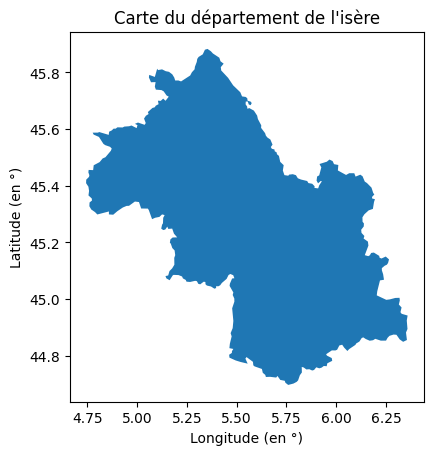

In [6]:
gdf.plot()
plt.title("Carte du département de l'isère")
plt.ylabel("Latitude (en °)")
plt.xlabel("Longitude (en °)")
plt.show()

In [7]:
gdf.explore()

## 🌍 Choix du système de coordonnées de référence (CRS)

La propriété <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html" target="_blank">geopandas.GeoSeries.area</a> permet de récupérer la surface des élèments d'une géométrie.

- Récupérer la **surface du département de l'isère**. Pourquoi cet avertissement ? (aide avec la propiété <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html" target="_blank">geopandas.GeoDataFrame.crs</a>)
- Changer de système de coordonnées de référence pour passer en **Web Mercator (EPSG:3857)** grâce à la méthode <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html" target="_blank">geopandas.GeoDataFrame.to_crs()</a>. Est-ce la bonne valeur de la surface ? Pourquoi ?
- Changer de système de coordonnées de référence pour passer en **RGF93 / Lambert-93 (EPSG:2154)**

In [8]:
gdf.area

/var/folders/vs/m1mxgk2x70dfhx9ydqjvgpf00000gp/T/ipykernel_1627/138307179.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.area


0    0.903121
dtype: float64

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
gdf_projected = gdf.to_crs("EPSG:3857")
gdf_projected.area

0    1.590113e+10
dtype: float64

In [11]:
gdf_projected.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
gdf_projected = gdf.to_crs("EPSG:2154")
gdf_projected.area

0    7.866308e+09
dtype: float64

In [13]:
gdf_projected.crs

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## ⛰️ Même chose pour l'agglomération de Grenoble

Les **limites des communes de la métropole de Grenoble** peuvent être récupérées à cette adresse au format **GeoJSON** : https://www.data.gouv.fr/fr/datasets/les-communes-de-la-metropole-1/

Comme précédemment :

- **Récupérer** les données dans un **GeoDataframe**
- **Afficher** les données sur une **carte**
- **Calculer la surface** de l'agglomération

In [14]:
metro = gpd.read_file("https://data.metropolegrenoble.fr/sites/default/files/dataset/2023/02/22/847e2e81-5903-4404-b77e-4c9c36ad1584/limites_communales_metro_epsg4326.json")
#metro = gpd.read_file("limites_communales_metro_epsg4326.geojson")
metro

code_insee                            nom trigram  code_postal  \
0        38057                        Bresson     BRE        38320   
1        38059                Bri-et-Angonnes     BEA        38320   
2        38068                    Champagnier     CHG        38800   
3        38071                 Champ-sur-Drac     CSD        38560   
4        38111                          Claix     CLX        38640   
5        38126                         Corenc     COR        38700   
6        38151                      chirolles     ECH        38130   
7        38158                         Eybens     EYB        38320   
8        38169                       Fontaine     FTN        38600   
9        38170          Le Fontanil-Cornillon     FTC        38120   
10       38179                          Gires     GIE        38610   
11       38200                         Jarrie     JAR        38560   
12       38229                         Meylan     MEY        38240   
13       38235               Miribel-Lanchtre     MBL        38450   
14       38187                         Le Gua     GUA        38450   
15       38188                        Herbeys     HRB        38320   
16       38185                       Grenoble     GRE        38000   
17       38252                    Montchaboud     MCB        38220   
18       38258              Mont-Saint-Martin     MSM        38120   
19       38271                     Murianette     MUR        38420   
20       38277         Notre-Dame-de-Commiers     NDC        38450   
21       38279            Notre-Dame-de-Msage     NDM        38220   
22       38281                        Noyarey     NOY        38360   
23       38309                         Poisat     POI        38320   
24       38317               Le Pont-de-Claix     PDC        38800   
25       38325                    Proveysieux     PVY        38120   
26       38328            Quaix-en-Chartreuse     QEC        38950   
27       38364  Saint-Barthlemy-de-Schilienne     SBS        38220   
28       38382                     Saint-grve     SEG        38120   
29       38388      Saint-Georges-de-Commiers     SGC        38450   
30       38423         Saint-Martin-le-Vinoux     SMV        38950   
31       38436           Saint-Paul-de-Varces     SPV        38760   
32       38421            Saint-Martin-d'Hres     SMH        38400   
33       38445          Saint-Pierre-de-Msage     SPM        38220   
34       38471        Le Sappey-en-Chartreuse     SPC        38700   
35       38472                       Sarcenas     SAR        38700   
36       38474                      Sassenage     SAS        38360   
37       38478                     Schilienne     SEC        38220   
38       38486                       Seyssins     SEY        38180   
39       38516                     La Tronche     LTR        38700   
40       38524       Varces-Allires-et-Risset     VAR        38760   
41       38485              Seyssinet-Pariset     SSP        38170   
42       38528              Vaulnaveys-le-Bas     VLB        38410   
43       38529             Vaulnaveys-le-Haut     VLH        38410   
44       38540                 Veurey-Voroize     VEV        38113   
45       38545                            Vif     VIF        38450   
46       38562                        Vizille     VIZ        38220   
47       38150                          Domne     DOM        38420   
48       38533                          Venon     VEN        38610   

                                            geo_shape  \
0   {'type': 'Polygon', 'coordinates': [[[5.737869...   
1   {'type': 'Polygon', 'coordinates': [[[5.763431...   
2   {'type': 'Polygon', 'coordinates': [[[5.722370...   
3   {'type': 'Polygon', 'coordinates': [[[5.723703...   
4   {'type': 'Polygon', 'coordinates': [[[5.635067...   
5   {'type': 'Polygon', 'coordinates': [[[5.761254...   
6   {'type': 'Polygon', 'coordinates': [[[5.722220...   
7   {'type': 'Polygon', 'coordinates': [[[5.743

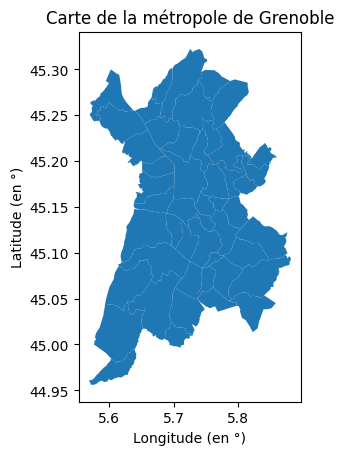

In [15]:
metro.plot()
plt.title("Carte de la métropole de Grenoble")
plt.ylabel("Latitude (en °)")
plt.xlabel("Longitude (en °)")
plt.show()

In [16]:
metro.explore()

In [17]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
metro_projected = metro.to_crs("EPSG:2154")
metro_projected.area

0     2.781830e+06
1     9.811570e+06
2     6.877274e+06
3     8.736567e+06
4     2.324651e+07
5     6.184404e+06
6     7.820485e+06
7     4.537472e+06
8     6.698676e+06
9     5.318742e+06
10    7.009085e+06
11    1.338088e+07
12    1.261923e+07
13    9.546672e+06
14    2.881187e+07
15    7.961381e+06
16    1.843241e+07
17    1.946974e+06
18    5.158034e+06
19    6.150902e+06
20    5.621271e+06
21    4.563171e+06
22    1.695831e+07
23    2.525897e+06
24    5.646723e+06
25    2.047302e+07
26    1.823824e+07
27    1.212752e+07
28    1.079846e+07
29    1.467662e+07
30    1.002548e+07
31    1.992085e+07
32    9.495542e+06
33    7.018032e+06
34    1.515270e+07
35    7.766660e+06
36    1.329303e+07
37    2.070782e+07
38    8.013796e+06
39    6.435401e+06
40    2.087804e+07
41    1.075173e+07
42    1.193946e+07
43    1.658068e+07
44    1.246317e+07
45    2.702562e+07
46    1.089157e+07
47    5.417472e+06
48    4.326591e+06
dtype: float64

In [19]:
metro_projected.area.sum()

542763853.5679443

## 📊 Analyse des données "Longue Vie Aux Objets" de l'ADEME

<a href="https://longuevieauxobjets.ademe.fr" target="_blank"><img src="https://epargnonsnosressources.gouv.fr/wp-content/uploads/2023/11/visuel_opengraph_carre.jpg" width=200px/></a>

> Donne accès aux **coordonnées de professionnels** dont l'activité permet d'**allonger la durée de vie des objets** : associations, entreprises, commerçants indépendants, artisans, enseignes de grande distribution, plateformes digitales, ...

> Certains d'entre eux, les **Répar'Acteurs**, sont signalés par un code **couleur vert** en raison de leur engagement en faveur de la **réparation des objets** avant tout remplacement par un produit neuf.
___
- Récupérer les **données** dans un **dataframe Pandas** (à l'aide de la fonction <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pandas.read_csv()</a> ⚠️ attention au séparateur !)
- Transformer ce dataframe en **GeoDataframe** (à l'aide de la classe <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html" target="_blank">geopandas.GeoDataFrame()</a>)
- Effectuer une **jointure spatiale** (à l'aide de la fonction <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html" target="_blank">geopandas.sjoin()</a>)
- **Afficher les points** qui sont dans le périmètre de l'agglomération de Grenoble

In [20]:
from shapely.geometry import Point

In [21]:
ademe = pd.read_csv("https://raw.githubusercontent.com/Pierre-Loic/meetup_carto/main/content/Ademe_LVAO_Data_For_Good.csv", sep=";")
#ademe = pd.read_csv("Ademe_LVAO_Data_For_Good.csv", sep=";")
ademe

identifiant_unique   acteur_type  \
0                Ademe_1      commerce   
1                Ademe_2  collectivité   
2                Ademe_3  collectivité   
3                Ademe_4  collectivité   
4                Ademe_5           ess   
...                  ...           ...   
34043        Ademe_34044  collectivité   
34044        Ademe_34045  collectivité   
34045        Ademe_34046  collectivité   
34046        Ademe_34047  collectivité   
34047        Ademe_34048  collectivité   

                                    proposition_services  \
0      [{'action': 'revendre', 'acteur_service': 'Ach...   
1      [{'action': 'emprunter', 'acteur_service': 'Es...   
2      [{'action': 'emprunter', 'acteur_service': 'Es...   
3      [{'action': 'emprunter', 'acteur_service': 'Es...   
4      [{'action': 'acheter', 'acteur_service': 'Recy...   
...                                                  ...   
34043  [{'action': 'emprunter', 'acteur_service': 'Es...   
34044  [{'action': 'emprunter', 'acteur_service': 'Es...   
34045  [{'action': 'emprunter', 'acteur_service': 'Es...   
34046  [{'action': 'emprunter', 'acteur_service': 'Es...   
34047  [{'action': 'emprunter', 'acteur_service': 'Es...   

                                             nom                   adresse  \
0            Cash Express MARSEILLE la valentine  111 route de la Sablière   
1              Bibliothèque Municipale Montoison       CHEMIN DES ECOLIERS   
2                     Médiathèque Et Espace Jeux      16 place des Arcades   
3                        Bibliothèque Municipale         1 Route de Joigny   
4      Délégation Croix Rouge Bourges -Vestiaire      3 Esplanade du Pardo   
...                                          ...                       ...   
34043         Bibliothèque Municipale De Boussac          Quartier Pasteur   
34044       Bibliothèque Associative D'Etalondes         Place de l'Eglise   
34045                       Bibliothèque D'Orsan       11 Place des Ecoles   
34046                              Point Lecture                  Segonzac   
34047                     Boîte à lire Tinteniac               Médiathèque   

            adresse_complement  code_postal                   ville  \
0                          NaN      13011.0  MARSEILLE la valentine   
1                          NaN      26800.0               Montoison   
2                          NaN       6250.0                 Mougins   
3                          NaN      89210.0    Brienon-sur-Armançon   
4                          NaN      18000.0                 Bourges   
...                        ...          ...                     ...   
34043                      NaN      23600.0                 Boussac   
34044                      NaN      76260.0               Étalondes   
34045  Bibliothèque municipale      30200.0                   Orsan   
34046                      NaN      19310.0                Segonzac   
34047  Derrière la médiathèque      35190.0               Tinteniac   

                                                     url   latitude  \
0      https://www.cashexpress.fr/produits-occasions/...  43.290718   
1                                                    NaN  44.795804   
2                                                    NaN  43.592901   
3                                                    NaN  47.990245   
4                                                    NaN  47.077603   
...                                                  ...        ...   
34043                                                NaN  46.349084   
34044                                                NaN  50.030214   
34045                                                NaN  44.131961   
34046                                                NaN  45.279500   
34047                                                NaN  48.330033   

       longitude nom_commercial nom_officiel           siret naf_principal  
0       5.473983            NaN          NaN  48806883400016

In [22]:
ademe['latitude'] = pd.to_numeric(ademe['latitude'], errors='coerce')
ademe['longitude'] = pd.to_numeric(ademe['longitude'], errors='coerce')

In [23]:
ademe_gdf = gpd.GeoDataFrame(ademe, geometry=[Point(xy) for xy in zip(ademe.longitude, ademe.latitude)])
ademe_gdf.crs = "EPSG:4326"
ademe_gdf

identifiant_unique   acteur_type  \
0                Ademe_1      commerce   
1                Ademe_2  collectivité   
2                Ademe_3  collectivité   
3                Ademe_4  collectivité   
4                Ademe_5           ess   
...                  ...           ...   
34043        Ademe_34044  collectivité   
34044        Ademe_34045  collectivité   
34045        Ademe_34046  collectivité   
34046        Ademe_34047  collectivité   
34047        Ademe_34048  collectivité   

                                    proposition_services  \
0      [{'action': 'revendre', 'acteur_service': 'Ach...   
1      [{'action': 'emprunter', 'acteur_service': 'Es...   
2      [{'action': 'emprunter', 'acteur_service': 'Es...   
3      [{'action': 'emprunter', 'acteur_service': 'Es...   
4      [{'action': 'acheter', 'acteur_service': 'Recy...   
...                                                  ...   
34043  [{'action': 'emprunter', 'acteur_service': 'Es...   
34044  [{'action': 'emprunter', 'acteur_service': 'Es...   
34045  [{'action': 'emprunter', 'acteur_service': 'Es...   
34046  [{'action': 'emprunter', 'acteur_service': 'Es...   
34047  [{'action': 'emprunter', 'acteur_service': 'Es...   

                                             nom                   adresse  \
0            Cash Express MARSEILLE la valentine  111 route de la Sablière   
1              Bibliothèque Municipale Montoison       CHEMIN DES ECOLIERS   
2                     Médiathèque Et Espace Jeux      16 place des Arcades   
3                        Bibliothèque Municipale         1 Route de Joigny   
4      Délégation Croix Rouge Bourges -Vestiaire      3 Esplanade du Pardo   
...                                          ...                       ...   
34043         Bibliothèque Municipale De Boussac          Quartier Pasteur   
34044       Bibliothèque Associative D'Etalondes         Place de l'Eglise   
34045                       Bibliothèque D'Orsan       11 Place des Ecoles   
34046                              Point Lecture                  Segonzac   
34047                     Boîte à lire Tinteniac               Médiathèque   

            adresse_complement  code_postal                   ville  \
0                          NaN      13011.0  MARSEILLE la valentine   
1                          NaN      26800.0               Montoison   
2                          NaN       6250.0                 Mougins   
3                          NaN      89210.0    Brienon-sur-Armançon   
4                          NaN      18000.0                 Bourges   
...                        ...          ...                     ...   
34043                      NaN      23600.0                 Boussac   
34044                      NaN      76260.0               Étalondes   
34045  Bibliothèque municipale      30200.0                   Orsan   
34046                      NaN      19310.0                Segonzac   
34047  Derrière la médiathèque      35190.0               Tinteniac   

                                                     url   latitude  \
0      https://www.cashexpress.fr/produits-occasions/...  43.290718   
1                                                    NaN  44.795804   
2                                                    NaN  43.592901   
3                                                    NaN  47.990245   
4                                                    NaN  47.077603   
...                                                  ...        ...   
34043                                                NaN  46.349084   
34044                                                NaN  50.030214   
34045                                                NaN  44.131961   
34046                                                NaN  45.279500   
34047                                                NaN  48.330033   

       longitude nom_commercial nom_officiel           siret naf_principal  \
0       5.473983            NaN          NaN  4880688340001

In [24]:
if ademe_gdf.crs != metro.crs:
    ademe_gdf = ademe_gdf.to_crs(metro.crs)

points_within_polygons = gpd.sjoin(ademe_gdf, metro, how="inner", predicate='within')

In [25]:
points_within_polygons.explore()